# Example: CUBA

https://brian2.readthedocs.io/en/stable/examples/CUBA.html

In [1]:
import sys
#sys.path.append('/home/jovyan/brian2lava')
# sys.path.append('/home/carlo/Entwicklung/Python/brian2lava')
sys.path.append('/home/francesco/Developing/B2L/brian2lava')

In [2]:
from brian2 import *

# Import Brian2Lava
import brian2lava

# Set device
set_device('lava', hardware='CPU')
# BrianLogger.log_level_debug()
# set_device('cpp_standalone')

Running Lava simulation for 100. ms (1001 steps)


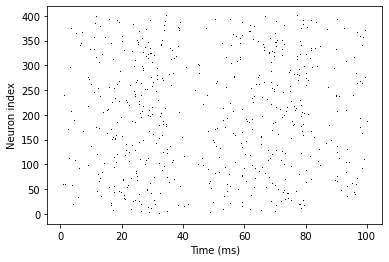

In [3]:
device = get_device()
device.reinit()
device.activate()
taum = 20*ms
taue = 5*ms
taui = 10*ms
Vt = -50*mV
Vr = -60*mV
El = -49*mV

eqs = '''
dv/dt  = (ge+gi-(v-El))/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
dgi/dt = -gi/taui : volt
'''

P = NeuronGroup(400, eqs, threshold='v>Vt', reset='v = Vr', refractory=5*ms,
                method='exact')
P.v = 'Vr + rand() * (Vt - Vr)'
P.ge = 0*mV
P.gi = 0*mV

we = (60*0.27/10)*mV # excitatory synaptic weight (voltage)
wi = (-20*4.5/10)*mV # inhibitory synaptic weight
Ce = Synapses(P, P, on_pre='ge += we')
Ci = Synapses(P, P, on_pre='gi += wi')
Ce.connect('i<320', p=0.02)
Ci.connect('i>=320', p=0.02)

s_mon = SpikeMonitor(P)

run(0.1 * second)

plot(s_mon.t/ms, s_mon.i, ',k')
xlabel('Time (ms)')
ylabel('Neuron index')
show()